### Notebook used to test the 3D contrucstion based on feature detection and depth stimation

To test it:
- Obtain Features of two frames
- Match the feature
- Stimate depth
- stimate pose

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os

In [6]:

DATASET_PATH = "..\\data\\rectified\\originals"
DATASET_NOT_REC = "..\\data\\video"

## Get the images
left_images = glob.glob(DATASET_PATH + "/seq_1/image_02/data/*.png")
right_images = glob.glob(DATASET_PATH + "/seq_1/image_03/data/*.png")

left_images_not_rectified = glob.glob(DATASET_NOT_REC + "/seq_01/image_02/data/*.png")
right_images_not_rectified = glob.glob(DATASET_NOT_REC + "/seq_01/image_03/data/*.png")

maxTimeStep = len(right_images)
print(maxTimeStep)

old_disparity = new_disparity = None

145


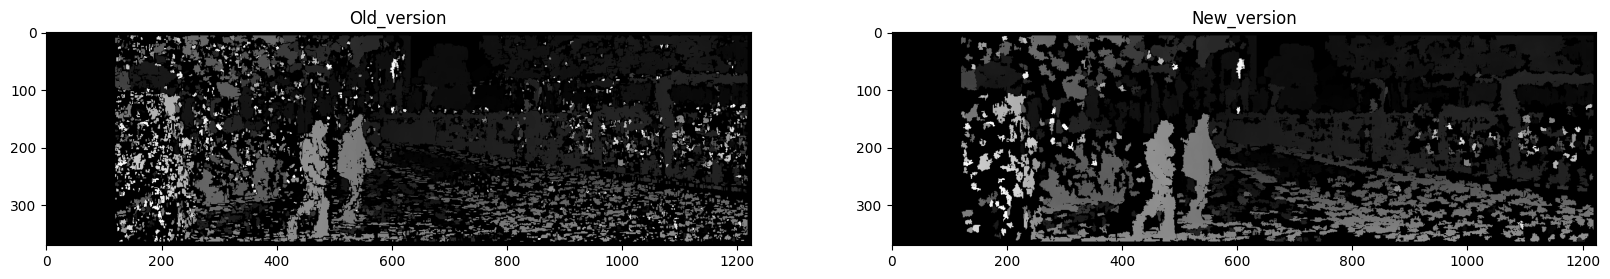

In [42]:
# for each image, get the corresponding image from the other camera
maxTimeStep = 3


blockSize = 13          # odd number
numDisparities = 16*7  # multiple of 16
preFilterType = 1
preFilterSize = 5
preFilterCap = 3
textureThreshold = 10
uniquenessRatio = 1

# affect the noise
speckleRange = 3
speckleWindowSize = 50

disp12MaxDiff = 1
minDisparity = 3



for t in range(maxTimeStep):
    # Get the image of cameras




    left_image = cv2.imread(left_images[t], cv2.IMREAD_GRAYSCALE)
    right_image = cv2.imread(right_images[t], cv2.IMREAD_GRAYSCALE)
    
    
    left_image_not_rectified = cv2.imread(left_images_not_rectified[t], cv2.IMREAD_GRAYSCALE)
    right_image_not_rectified = cv2.imread(right_images_not_rectified[t], cv2.IMREAD_GRAYSCALE)

    ####################################################
    # get the disparity map
    ####################################################
 
    stereo = cv2.StereoBM_create()

    stereo.setNumDisparities(numDisparities)
    stereo.setBlockSize(blockSize)
    stereo.setPreFilterType(preFilterType)
    stereo.setPreFilterSize(preFilterSize)
    stereo.setPreFilterCap(preFilterCap)
    stereo.setTextureThreshold(textureThreshold)
    stereo.setUniquenessRatio(uniquenessRatio)
    stereo.setSpeckleRange(speckleRange)
    stereo.setSpeckleWindowSize(speckleWindowSize)
    stereo.setDisp12MaxDiff(disp12MaxDiff)
    stereo.setMinDisparity(minDisparity)


    disparity = stereo.compute(left_image, right_image)
    disparity_not_rectified = stereo.compute(left_image_not_rectified, right_image_not_rectified)


#plot both disparity maps
#plt.figure(figsize=(20,10))
#plt.subplot(121)
#plt.imshow(old_disparity,'gray')
#plt.subplot(122)
#plt.imshow(disparity,'gray')


# plot the depth map with the calibrated and not calobrated images with titles
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(old_disparity,'gray')
plt.title("Old_version")
plt.subplot(122)
plt.imshow(disparity,'gray')
plt.title("New_version")


# Update for next iteration
old_disparity = disparity



In [ ]:

# plot the depth map with the calibrated and not calobrated images with titles
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(disparity,'gray')
plt.title("Calibrated")
plt.subplot(122)
plt.imshow(disparity_not_rectified,'gray')
plt.title("Not Calibrated")
